### Llibreries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

### Act 1

In [39]:
pac1 = pd.read_csv("r1_data_2024.csv")
pac1.head(5)

,Id,ClosedAccount,Age,Gender,Education,CivilState,Salary,Product,NumMonthsBeingClient,NumProductsClient,NumMonthsWithoutOperating,CreditLimit,CreditNotPayed,SumTransactionAmount,NumTransactions
0,768805383,NO,45.0,M,High School,Married,$60K - $80K,1,39,5,1,12691.0,777.0,1144,42
1,818770008,NO,49.0,F,Graduate,Single,Less than $40K,1,44,6,1,8256.0,864.0,1291,33
2,713982108,NO,51.0,M,Graduate,Married,$80K - $120K,1,36,4,1,3418.0,0.0,1887,20
3,769911858,NO,40.0,NaN,High School,Unknown,Less than $40K,1,34,3,4,3313.0,2517.0,1171,20
4,709106358,NO,40.0,M,Uneducated,Married,$60K - $80K,1,21,5,1,4716.0,0.0,816,28


In [40]:
# 1a 
print("Num samples:",len(pac1))
num_categoriques = len(pac1.select_dtypes(object).columns)
print("Categorical:", num_categoriques)
print("Numerical:", pac1.shape[1]-num_categoriques)
pac1.dtypes

Num samples: 10127
Categorical: 5
Numerical: 10


Id                             int64
ClosedAccount                 object
Age                          float64
Gender                        object
Education                     object
CivilState                    object
Salary                        object
Product                        int64
NumMonthsBeingClient           int64
NumProductsClient              int64
NumMonthsWithoutOperating      int64
CreditLimit                  float64
CreditNotPayed               float64
SumTransactionAmount           int64
NumTransactions                int64
dtype: object

In [41]:
# 1b
pac1.isna().sum()

Id                             0
ClosedAccount                  0
Age                          121
Gender                       111
Education                      0
CivilState                   115
Salary                        70
Product                        0
NumMonthsBeingClient           0
NumProductsClient              0
NumMonthsWithoutOperating      0
CreditLimit                  102
CreditNotPayed                63
SumTransactionAmount           0
NumTransactions                0
dtype: int64

In [42]:
# 1b
pac1 = pac1.dropna()
print("Num samples without nulls:", len(pac1))

Num samples without nulls: 9559


In [43]:
pac1.ClosedAccount.value_counts()

NO     8137
YES    1422
Name: ClosedAccount, dtype: int64

In [44]:
# 1c

In [45]:
pac1[pac1.Gender=='M']['Education'].value_counts()

Graduate         1384
High School       926
Unknown           665
Uneducated        654
College           454
Post-Graduate     234
Doctorate         183
Name: Education, dtype: int64

In [46]:
pac1[pac1.Gender=='F']['Education'].value_counts()

Graduate         1592
High School       958
Unknown           763
Uneducated        750
College           506
Post-Graduate     247
Doctorate         243
Name: Education, dtype: int64

In [47]:
pac1[pac1.Gender=='M']['Salary'].value_counts()

$80K - $120K      1435
$60K - $80K       1322
$40K - $60K        737
$120K +            696
Less than $40K     263
Unknown             47
Name: Salary, dtype: int64

In [48]:
pac1[pac1.Gender=='F']['Salary'].value_counts()

Less than $40K    3085
Unknown           1010
$40K - $60K        964
Name: Salary, dtype: int64

In [49]:
# 1d
pac1.Education.value_counts()

Graduate         2976
High School      1884
Unknown          1428
Uneducated       1404
College           960
Post-Graduate     481
Doctorate         426
Name: Education, dtype: int64

In [50]:
# 1d
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values='Unknown',strategy='most_frequent')
c = pac1.select_dtypes(object).columns 
pac1[c] = impute.fit_transform(pac1[c])

In [51]:
# 1d
pac1.Education.value_counts()

Graduate         4404
High School      1884
Uneducated       1404
College           960
Post-Graduate     481
Doctorate         426
Name: Education, dtype: int64

In [52]:
# 1e
pac1['Gender'] = np.where(pac1['Gender']=='M', 'Masc', pac1['Gender'])
pac1['Gender'] = np.where(pac1['Gender']=='F', 'Fem', pac1['Gender'])

In [ ]:
# 1f
# i)
fig1 = px.histogram(df_sense_nuls, x='Age', title='Distribució de les edats dels clients')
# ii) 
fig2 = px.histogram(df_sense_nuls, x='Age', color='Gender', title='Distribució de les edats dels clients per sexe')
# iii) 
fig3 = px.histogram(df_sense_nuls, x='Gender', color='ClosedAccount', title='Distribució de clients que han marxat i s’han quedat per sexe')
# iv) 
fig4 = px.histogram(df_sense_nuls, x='Salary', color='ClosedAccount', title='Distribució de clients que han marxat i s’han quedat per rang d’ingresos')
# v) 
fig5 = px.histogram(df_sense_nuls, x='Education', color='ClosedAccount', title='Distribució de clients que han marxat i s’han quedat per educació')
# vi) 
fig6 = px.histogram(df_sense_nuls, x='Product', color='ClosedAccount', title='Distribució de clients que han marxat i s’han quedat per tipus de producte que tenen')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

In [53]:
# 1g
rangs = np.arange(min(pac1.Age.values)-1, max(pac1.Age.values)+5, 5)
print(rangs)

# Creating the column
pac1['RangsAge'] = pd.cut(pac1['Age'], rangs)
pac1['RangsAge'] = pac1['RangsAge'].astype(str)
pac1['RangsAge'].value_counts()

[25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75.]


(45.0, 50.0]    2276
(40.0, 45.0]    2127
(50.0, 55.0]    1653
(35.0, 40.0]    1376
(55.0, 60.0]     876
(30.0, 35.0]     608
(60.0, 65.0]     376
(25.0, 30.0]     257
(65.0, 70.0]       9
(70.0, 75.0]       1
Name: RangsAge, dtype: int64

In [54]:
# 1h
fig = px.histogram(pac1, x='RangsAge')
fig.update_layout(bargap=0.05)
fig.show()

In [55]:
# 1g-ii
fig = px.histogram(pac1, x='RangsAge', color='Gender', barmode='group')
fig.update_layout(bargap=0.05)
fig.show()

In [56]:
data_1 = pac1.copy()

### Act 2

In [57]:
# 2d
pac1.drop(columns=['Id', 'ClosedAccount', 'RangsAge'], inplace=True)

data_2 = pac1.copy()

In [58]:
# 2b

corr_data = pac1.corr()
fig = px.imshow(round(pac1.corr(),3), text_auto = True, color_continuous_scale = 'greens')
fig.show()

/var/folders/7n/7sd9b6_54xd7hkqv5zqd3yth0000gn/T/ipykernel_46236/525655924.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/7n/7sd9b6_54xd7hkqv5zqd3yth0000gn/T/ipykernel_46236/525655924.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [59]:
# 2c 
pac1['AvgAmountTransaction'] = pac1['SumTransactionAmount'].values/pac1['NumTransactions'].values
pac1.head()

,Age,Gender,Education,CivilState,Salary,Product,NumMonthsBeingClient,NumProductsClient,NumMonthsWithoutOperating,CreditLimit,CreditNotPayed,SumTransactionAmount,NumTransactions,AvgAmountTransaction
0,45.0,Masc,High School,Married,$60K - $80K,1,39,5,1,12691.0,777.0,1144,42,27.238095
1,49.0,Fem,Graduate,Single,Less than $40K,1,44,6,1,8256.0,864.0,1291,33,39.121212
2,51.0,Masc,Graduate,Married,$80K - $120K,1,36,4,1,3418.0,0.0,1887,20,94.350000
4,40.0,Masc,Uneducated,Married,$60K - $80K,1,21,5,1,4716.0,0.0,816,28,29.142857
6,51.0,Masc,Graduate,Married,$120K +,3,46,6,1,34516.0,2264.0,1330,31,42.903226


In [60]:
# 2c
corr_data = pac1.corr()
fig = px.imshow(round(pac1.corr(),3), text_auto = True, color_continuous_scale = 'greens')
fig.show()

/var/folders/7n/7sd9b6_54xd7hkqv5zqd3yth0000gn/T/ipykernel_46236/3025869215.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/7n/7sd9b6_54xd7hkqv5zqd3yth0000gn/T/ipykernel_46236/3025869215.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [61]:
# 2f
pac1.drop(columns=['AvgAmountTransaction'], inplace=True)

In [62]:
# 2f
pac1 =pd.get_dummies(pac1, columns = ['Gender','Education','CivilState','Salary','Product'])

In [63]:
pac1.head()

,Age,NumMonthsBeingClient,NumProductsClient,NumMonthsWithoutOperating,CreditLimit,CreditNotPayed,SumTransactionAmount,NumTransactions,Gender_Fem,Gender_Masc,...,CivilState_Single,Salary_$120K +,Salary_$40K - $60K,Salary_$60K - $80K,Salary_$80K - $120K,Salary_Less than $40K,Product_1,Product_2,Product_3,Product_4
0,45.0,39,5,1,12691.0,777.0,1144,42,0,1,...,0,0,0,1,0,0,1,0,0,0
1,49.0,44,6,1,8256.0,864.0,1291,33,1,0,...,1,0,0,0,0,1,1,0,0,0
2,51.0,36,4,1,3418.0,0.0,1887,20,0,1,...,0,0,0,0,1,0,1,0,0,0
4,40.0,21,5,1,4716.0,0.0,816,28,0,1,...,0,0,0,1,0,0,1,0,0,0
6,51.0,46,6,1,34516.0,2264.0,1330,31,0,1,...,0,1,0,0,0,0,0,0,1,0


In [67]:
# 2g
pac1=(pac1-pac1.mean())/pac1.std()
pac1.head(5)

,Age,NumMonthsBeingClient,NumProductsClient,NumMonthsWithoutOperating,CreditLimit,CreditNotPayed,SumTransactionAmount,NumTransactions,Gender_Fem,Gender_Masc,...,CivilState_Single,Salary_$120K +,Salary_$40K - $60K,Salary_$60K - $80K,Salary_$80K - $120K,Salary_Less than $40K,Product_1,Product_2,Product_3,Product_4
0,-0.169584,0.380822,0.763689,-1.326455,0.442297,-0.472726,-0.964584,-0.979630,-1.060238,1.060238,...,-0.798316,-0.280215,-0.465236,2.496009,-0.420260,-0.924439,0.270097,-0.23935,-0.109369,-0.044625
1,0.328971,1.006063,1.407550,-1.326455,-0.044335,-0.365872,-0.920985,-1.364836,0.943086,-0.943086,...,1.252505,-0.280215,-0.465236,-0.400598,-0.420260,1.081625,0.270097,-0.23935,-0.109369,-0.044625
2,0.578248,0.005677,0.119827,-1.326455,-0.575185,-1.427042,-0.744220,-1.921245,-1.060238,1.060238,...,-0.798316,-0.280215,-0.465236,-0.400598,2.379229,-0.924439,0.270097,-0.23935,-0.109369,-0.044625
4,-0.792777,-1.870046,0.763689,-1.326455,-0.432762,-1.427042,-1.061864,-1.578840,-1.060238,1.060238,...,-0.798316,-0.280215,-0.465236,2.496009,-0.420260,-0.924439,0.270097,-0.23935,-0.109369,-0.044625
6,0.578248,1.256160,1.407550,-1.326455,2.837050,1.353617,-0.909419,-1.450438,-1.060238,1.060238,...,-0.798316,3.568314,-0.465236,-0.400598,-0.420260,-0.924439,-3.701989,-0.23935,9.142438,-0.044625


In [68]:
# 2h
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(asd)

component_names = [f"C{i+1}" for i in range(data_pca.shape[1])]
data_pca = pd.DataFrame(data_pca, columns=component_names)

data_pca.head(2)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28
0,1.702010,-2.289639,0.262205,-0.671037,0.230739,1.302812,0.122142,-2.330989,1.620823,0.027491,...,0.213979,-0.596588,0.073425,-0.421548,-0.001455,-6.162248e-16,-1.464673e-14,6.345192e-16,4.326645e-16,6.389567e-16
1,-1.890652,-0.410802,-0.021198,1.839787,1.845032,-1.243076,-0.367081,-0.405315,-0.171394,-0.234065,...,0.455896,-0.376440,0.383133,-0.392819,0.524487,9.529545e-16,-1.597883e-16,3.192447e-16,6.202856e-16,-2.701715e-16


<function matplotlib.pyplot.show(close=None, block=None)>

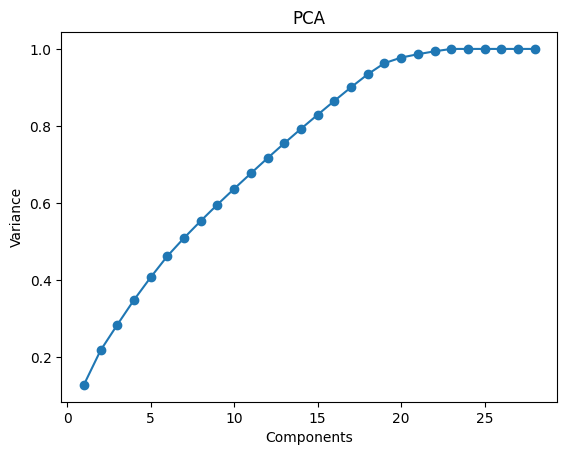

In [69]:
# 2g
from sklearn.preprocessing import StandardScaler
pca_plot = pca.fit(pac1)
var = np.cumsum(pca_plot.explained_variance_ratio_)
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='-')
plt.title('PCA')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show